<a href="https://colab.research.google.com/github/maadunson128/electoral_bonds_analysis/blob/master/eda_electoral_bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will contains the data transformation of electoral bonds data and initial exploratory data analysis of the dataset located in the data folder.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
#reading the csv files
df1 = pd.read_csv('/content/drive/MyDrive/Projects/Data/Electoral_Data_Analysis/EB_Purchase_Details.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Projects/Data/Electoral_Data_Analysis/EB_Redemption_Details.csv')

In [22]:
df1

,Sr No.,Reference No (URN),Journal Date,Date of\rPurchase,Date of Expiry,Name of the Purchaser,Prefix,Bond\rNumber,Denominations,Issue Branch Code,Issue Teller,Status
0,1,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL,11448,"10,00,000",1,5899230,Paid
1,2,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL,11447,"10,00,000",1,5899230,Paid
2,3,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL,11441,"10,00,000",1,5899230,Paid
3,4,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,OL,1113,"1,00,000",1,5899230,Paid
4,5,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,OL,1118,"1,00,000",1,5899230,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...
18866,18867,1202401110000003729,11/Jan/2024,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC,15695,"1,00,00,000",1,5898161,Paid
18867,18868,1202401110000003729,11/Jan/2024,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC,15693,"1,00,00,000",1,5898161,Paid
18868,18869,1202401110000003729,11/Jan/2024,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC,15697,"1,00,00,000",1,5898161,Paid
18869,18870,1202401110000003729,11/Jan/2024,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC,17803,"1,00,00,000",1,5898161,Paid


In [23]:
df2

,Sr No.,Date of\rEncashment,Name of the Political Party,Account no. of\rPolitical Party,Prefix,Bond\rNumber,Denominations,Pay Branch\rCode,Pay Teller
0,1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,"1,00,00,000",800,2770121
1,2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3975,"1,00,00,000",800,2770121
2,3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3967,"1,00,00,000",800,2770121
3,4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,10418,"10,00,000",800,2770121
4,5,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,126,"10,00,000",800,2770121
...,...,...,...,...,...,...,...,...,...
20416,20417,24/Jan/2024,JANASENA PARTY,*******3929,TL,2619,"10,00,000",847,7620160
20417,20418,24/Jan/2024,JANASENA PARTY,*******3929,TL,2608,"10,00,000",847,7620160
20418,20419,24/Jan/2024,JANASENA PARTY,*******3929,TL,2633,"10,00,000",847,7620160
20419,20420,24/Jan/2024,JANASENA PARTY,*******3929,TL,2627,"10,00,000",847,7620160


In [24]:
#combining the prefix and bond number in both dataframes.
df1['UniqueID'] = df1['Prefix'] + df1['Bond\rNumber'].astype(str)
df2['UniqueID'] = df2['Prefix'] + df2['Bond\rNumber'].astype(str)

In [25]:
df1

,Sr No.,Reference No (URN),Journal Date,Date of\rPurchase,Date of Expiry,Name of the Purchaser,Prefix,Bond\rNumber,Denominations,Issue Branch Code,Issue Teller,Status,UniqueID
0,1,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL,11448,"10,00,000",1,5899230,Paid,TL11448
1,2,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL,11447,"10,00,000",1,5899230,Paid,TL11447
2,3,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL,11441,"10,00,000",1,5899230,Paid,TL11441
3,4,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,OL,1113,"1,00,000",1,5899230,Paid,OL1113
4,5,00001201904120000001166,12/Apr/2019,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,OL,1118,"1,00,000",1,5899230,Paid,OL1118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18866,18867,1202401110000003729,11/Jan/2024,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC,15695,"1,00,00,000",1,5898161,Paid,OC15695
18867,18868,1202401110000003729,11/Jan/2024,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC,15693,"1,00,00,000",1,5898161,Paid,OC15693
18868,18869,1202401110000003729,11/Jan/2024,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC,15697,"1,00,00,000",1,5898161,Paid,OC15697
18869,18870,1202401110000003729,11/Jan/2024,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC,17803,"1,00,00,000",1,5898161,Paid,OC17803


In [26]:
df2

,Sr No.,Date of\rEncashment,Name of the Political Party,Account no. of\rPolitical Party,Prefix,Bond\rNumber,Denominations,Pay Branch\rCode,Pay Teller,UniqueID
0,1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,"1,00,00,000",800,2770121,OC775
1,2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3975,"1,00,00,000",800,2770121,OC3975
2,3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3967,"1,00,00,000",800,2770121,OC3967
3,4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,10418,"10,00,000",800,2770121,TL10418
4,5,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,126,"10,00,000",800,2770121,TL126
...,...,...,...,...,...,...,...,...,...,...
20416,20417,24/Jan/2024,JANASENA PARTY,*******3929,TL,2619,"10,00,000",847,7620160,TL2619
20417,20418,24/Jan/2024,JANASENA PARTY,*******3929,TL,2608,"10,00,000",847,7620160,TL2608
20418,20419,24/Jan/2024,JANASENA PARTY,*******3929,TL,2633,"10,00,000",847,7620160,TL2633
20419,20420,24/Jan/2024,JANASENA PARTY,*******3929,TL,2627,"10,00,000",847,7620160,TL2627


In [27]:
#Checking whether the unique ID's are same with the number of rows for each dataframe.
print(df1.UniqueID.nunique())
print(df2.UniqueID.nunique())

18871
20421


From the above results, we can tell that the numbers exactly matches with number of rows in each dataframe.

In [28]:
#dropping the columns 'Prefix' and 'Bond Number' from two dataframes.
df1.drop(['Prefix', 'Bond\rNumber'], inplace=True, axis=1)
df2.drop(['Prefix', 'Bond\rNumber'], inplace=True, axis=1)

In [29]:
df1.columns

Index(['Sr No.', 'Reference No  (URN)', 'Journal Date', 'Date of\rPurchase',
       'Date of Expiry', 'Name of the Purchaser', 'Denominations',
       'Issue Branch Code', 'Issue Teller', 'Status', 'UniqueID'],
      dtype='object')

In [30]:
df2.columns

Index(['Sr No.', 'Date of\rEncashment', 'Name of the Political Party',
       'Account no. of\rPolitical Party', 'Denominations', 'Pay Branch\rCode',
       'Pay Teller', 'UniqueID'],
      dtype='object')

Now, We are going to merge the two dataframes into a single one based on the column 'UniqueID'.

In [31]:
df_merged = pd.merge(df1, df2, on='UniqueID', how='outer')

In [32]:
df_merged.columns

Index(['Sr No._x', 'Reference No  (URN)', 'Journal Date', 'Date of\rPurchase',
       'Date of Expiry', 'Name of the Purchaser', 'Denominations_x',
       'Issue Branch Code', 'Issue Teller', 'Status', 'UniqueID', 'Sr No._y',
       'Date of\rEncashment', 'Name of the Political Party',
       'Account no. of\rPolitical Party', 'Denominations_y',
       'Pay Branch\rCode', 'Pay Teller'],
      dtype='object')

From the merged table, we can see that there are two 'Sr No.' and 'Denominations' on the merged dataframe. I think we can remove the sr No.

In [33]:
df_merged

,Sr No._x,Reference No (URN),Journal Date,Date of\rPurchase,Date of Expiry,Name of the Purchaser,Denominations_x,Issue Branch Code,Issue Teller,Status,UniqueID,Sr No._y,Date of\rEncashment,Name of the Political Party,Account no. of\rPolitical Party,Denominations_y,Pay Branch\rCode,Pay Teller
0,8985.0,00847202204080000002387,08/Apr/2022,08/Apr/2022,22/Apr/2022,KOYA AND COMPANY CONSTRUCTION LTD,"1,00,00,000",847.0,3898296.0,Paid,OC10000,10376.0,12/Apr/2022,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,3898296.0
1,5806.0,00300202110070000001967,07/Oct/2021,07/Oct/2021,21/Oct/2021,K RAHEJA CORP PVT LTD,"1,00,00,000",300.0,7905165.0,Paid,OC10001,7043.0,08/Oct/2021,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,6417329.0
2,5775.0,00300202110070000001984,07/Oct/2021,07/Oct/2021,21/Oct/2021,CAPSTAN TRADING LLP,"1,00,00,000",300.0,7905165.0,Paid,OC10002,7066.0,08/Oct/2021,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,6417329.0
3,5808.0,00300202110070000001967,07/Oct/2021,07/Oct/2021,21/Oct/2021,K RAHEJA CORP PVT LTD,"1,00,00,000",300.0,7905165.0,Paid,OC10003,7045.0,08/Oct/2021,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,6417329.0
4,5774.0,00300202110070000001984,07/Oct/2021,07/Oct/2021,21/Oct/2021,CAPSTAN TRADING LLP,"1,00,00,000",300.0,7905165.0,Paid,OC10004,7065.0,08/Oct/2021,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,6417329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20546,16691.0,00001202310130000003471,13/Oct/2023,13/Oct/2023,27/Oct/2023,BASUDEV AGARWAL,"10,000",1.0,5898161.0,Paid,TT9979,17818.0,17/Oct/2023,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",*******4012,"10,000",691.0,7516991.0
20547,16746.0,00001202310130000003464,13/Oct/2023,13/Oct/2023,27/Oct/2023,MANOJ KUMAR AGARWAL,"10,000",1.0,5898161.0,Paid,TT9980,17814.0,17/Oct/2023,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",*******4012,"10,000",691.0,7516991.0
20548,16695.0,00001202310130000003471,13/Oct/2023,13/Oct/2023,27/Oct/2023,BASUDEV AGARWAL,"10,000",1.0,5898161.0,Paid,TT9981,17822.0,17/Oct/2023,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",*******4012,"10,000",691.0,7516991.0
20549,16692.0,00001202310130000003471,13/Oct/2023,13/Oct/2023,27/Oct/2023,BASUDEV AGARWAL,"10,000",1.0,5898161.0,Paid,TT9983,17819.0,17/Oct/2023,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",*******4012,"10,000",691.0,7516991.0


In [35]:
# Get the UniqueIDs that are in df2 but not in df1
unique_ids_in_df2_not_in_df1 = df2[~df2['UniqueID'].isin(df1['UniqueID'])]

print(unique_ids_in_df2_not_in_df1)


      Sr No. Date of\rEncashment               Name of the Political Party  \
0          1         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
1          2         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
2          3         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
3          4         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
4          5         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
...      ...                 ...                                       ...   
2804    2805         25/Apr/2019                    BHARATIYA JANATA PARTY   
2805    2806         25/Apr/2019                    BHARATIYA JANATA PARTY   
2853    2854         25/Apr/2019                                  SHIVSENA   
2854    2855         25/Apr/2019                                  SHIVSENA   
2855    2856         25/Apr/2019                                  SHIVSENA   

     Account no. of\rPolitical Party Denominations  Pay Branch\

In [36]:
20551 - 1680

18871

**After merging the two dataframes, We can see that the number of rows has increased (more tha the two dataframes). This clearly tells that the donated money to some parties that are not listed in the Purchased data.**

There are missing of 1680 records that are missing from the Purchased dataframe.

I think we can drop the Sr No. columns. Its not important for our analysis.

In [38]:
#removing the two sr.no columns
df_merged.drop(['Sr No._x', 'Sr No._y'], inplace=True, axis=1)

KeyError: "['Sr No._x', 'Sr No._y'] not found in axis"

In [40]:
df_merged.columns

Index(['Reference No  (URN)', 'Journal Date', 'Date of\rPurchase',
       'Date of Expiry', 'Name of the Purchaser', 'Denominations_x',
       'Issue Branch Code', 'Issue Teller', 'Status', 'UniqueID',
       'Date of\rEncashment', 'Name of the Political Party',
       'Account no. of\rPolitical Party', 'Denominations_y',
       'Pay Branch\rCode', 'Pay Teller'],
      dtype='object')

In [41]:
df_merged

,Reference No (URN),Journal Date,Date of\rPurchase,Date of Expiry,Name of the Purchaser,Denominations_x,Issue Branch Code,Issue Teller,Status,UniqueID,Date of\rEncashment,Name of the Political Party,Account no. of\rPolitical Party,Denominations_y,Pay Branch\rCode,Pay Teller
0,00847202204080000002387,08/Apr/2022,08/Apr/2022,22/Apr/2022,KOYA AND COMPANY CONSTRUCTION LTD,"1,00,00,000",847.0,3898296.0,Paid,OC10000,12/Apr/2022,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,3898296.0
1,00300202110070000001967,07/Oct/2021,07/Oct/2021,21/Oct/2021,K RAHEJA CORP PVT LTD,"1,00,00,000",300.0,7905165.0,Paid,OC10001,08/Oct/2021,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,6417329.0
2,00300202110070000001984,07/Oct/2021,07/Oct/2021,21/Oct/2021,CAPSTAN TRADING LLP,"1,00,00,000",300.0,7905165.0,Paid,OC10002,08/Oct/2021,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,6417329.0
3,00300202110070000001967,07/Oct/2021,07/Oct/2021,21/Oct/2021,K RAHEJA CORP PVT LTD,"1,00,00,000",300.0,7905165.0,Paid,OC10003,08/Oct/2021,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,6417329.0
4,00300202110070000001984,07/Oct/2021,07/Oct/2021,21/Oct/2021,CAPSTAN TRADING LLP,"1,00,00,000",300.0,7905165.0,Paid,OC10004,08/Oct/2021,BHARAT RASHTRA SAMITHI,*******7477,"1,00,00,000",847.0,6417329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20546,00001202310130000003471,13/Oct/2023,13/Oct/2023,27/Oct/2023,BASUDEV AGARWAL,"10,000",1.0,5898161.0,Paid,TT9979,17/Oct/2023,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",*******4012,"10,000",691.0,7516991.0
20547,00001202310130000003464,13/Oct/2023,13/Oct/2023,27/Oct/2023,MANOJ KUMAR AGARWAL,"10,000",1.0,5898161.0,Paid,TT9980,17/Oct/2023,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",*******4012,"10,000",691.0,7516991.0
20548,00001202310130000003471,13/Oct/2023,13/Oct/2023,27/Oct/2023,BASUDEV AGARWAL,"10,000",1.0,5898161.0,Paid,TT9981,17/Oct/2023,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",*******4012,"10,000",691.0,7516991.0
20549,00001202310130000003471,13/Oct/2023,13/Oct/2023,27/Oct/2023,BASUDEV AGARWAL,"10,000",1.0,5898161.0,Paid,TT9983,17/Oct/2023,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",*******4012,"10,000",691.0,7516991.0


In [42]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551 entries, 0 to 20550
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Reference No  (URN)             18871 non-null  object 
 1   Journal Date                    18871 non-null  object 
Purchase                18871 non-null  object 
 3   Date of Expiry                  18871 non-null  object 
 4   Name of the Purchaser           18871 non-null  object 
 5   Denominations_x                 18871 non-null  object 
 6   Issue Branch Code               18871 non-null  float64
 7   Issue Teller                    18871 non-null  float64
 8   Status                          18871 non-null  object 
 9   UniqueID                        20551 non-null  object 
Encashment              20421 non-null  object 
 11  Name of the Political Party     20421 non-null  object 
Political Party  20421 non-null  object 
 13  Denominations_y  

From the info, we can see that there are some columns that have different Non-Null Values Count.
We can infer that the following statements.


1.   Some Data of Purchasers are missing.Because, uniqueID has 20551 records but there are only 18871 records available in Purchased data.
2.   Some Donated money may not be encashed. Even though, there are 20551 Unique IDs, there are only 20421 details available to the encashed amount.



In [48]:
duplicates = df_merged['UniqueID'].duplicated()
print(duplicates.sum())

0


The above confirms that the 'UniqueID' are all unique. This further ensures the above statement.

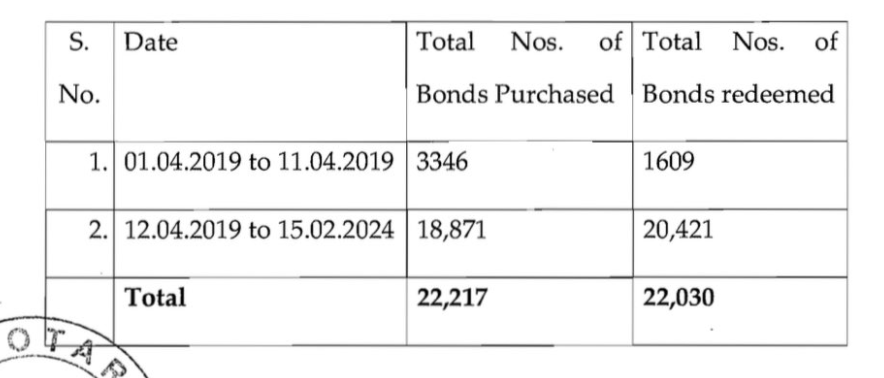